In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
snsx = pd.read_csv('SENSEX.csv')
snsx

,Year,Open,High,Low,Close
1980,NaN,NaN,NaN,148.25,NaN
1981,NaN,NaN,NaN,227.72,NaN
1982,NaN,NaN,NaN,235.83,NaN
1983,NaN,NaN,NaN,252.92,NaN
1984,NaN,NaN,NaN,271.87,NaN
1985,NaN,NaN,NaN,527.36,NaN
1986,NaN,NaN,NaN,524.45,NaN
1987,NaN,NaN,NaN,442.17,NaN
1988,NaN,NaN,NaN,666.26,NaN
1989,NaN,NaN,NaN,778.64,NaN


In [3]:
bse500 = pd.read_csv('BSE500.csv')

In [4]:
bse500 = bse500["Low"]
bse500 = bse500.reset_index().rename(columns={'index': 'Year', "Low": "Price"})
bse500['Year'] = pd.to_datetime(bse500['Year'], format='%Y')
bse500['Year'] = bse500['Year'].dt.year

# Set the 'Year' column as the index
bse500.set_index('Year', inplace=True)

# Calculate the yearly returns based on the closing price
bse500['returns'] = bse500['Price'].pct_change()*100

# Fill NaN values in returns with 0
bse500['returns'] = bse500['returns'].fillna(0)

bse500.head()

,Price,returns
Year,,
1999,1791.44,0.000000
2000,1304.66,-27.172554
2001,1005.82,-22.905585
2002,1176.73,16.992106
2003,2366.36,101.096258


In [5]:
snsx = snsx["Low"]
snsx = snsx.reset_index().rename(columns={'index': 'Year', "Low": "Price"})
snsx['Year'] = pd.to_datetime(snsx['Year'], format='%Y')
snsx['Year'] = snsx['Year'].dt.year

# Set the 'Year' column as the index
snsx.set_index('Year', inplace=True)

# Calculate the yearly returns based on the closing price
snsx['returns'] = snsx['Price'].pct_change()*100
snsx.returns = snsx.returns.fillna(0)
snsx.head()

,Price,returns
Year,,
1980,148.25,0.000000
1981,227.72,53.605396
1982,235.83,3.561391
1983,252.92,7.246746
1984,271.87,7.492488


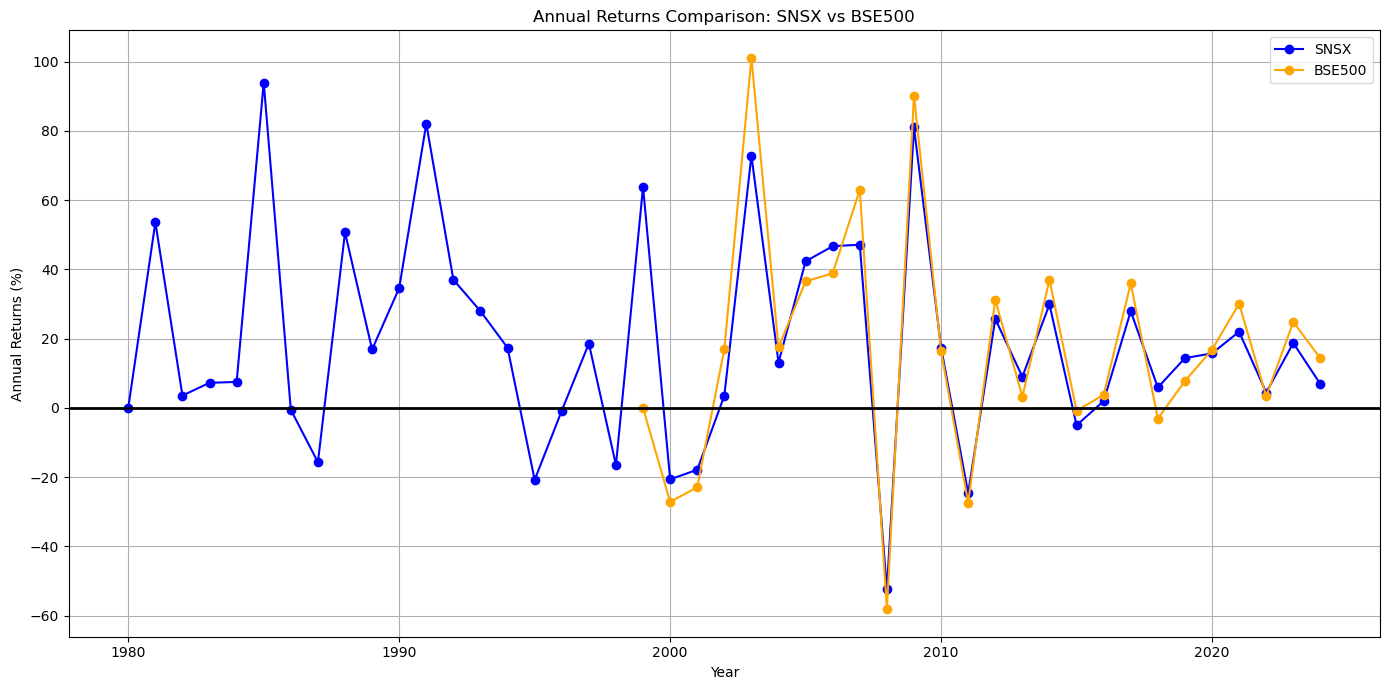

In [6]:
# Plotting annual returns
plt.figure(figsize=(14, 7))

plt.plot(snsx.index, snsx['returns'], marker='o', linestyle='-', color='blue', label='SNSX')
plt.plot(bse500.index, bse500['returns'], marker='o', linestyle='-', color='orange', label='BSE500')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Adding labels and title
plt.title('Annual Returns Comparison: SNSX vs BSE500')
plt.xlabel('Year')
plt.ylabel('Annual Returns (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


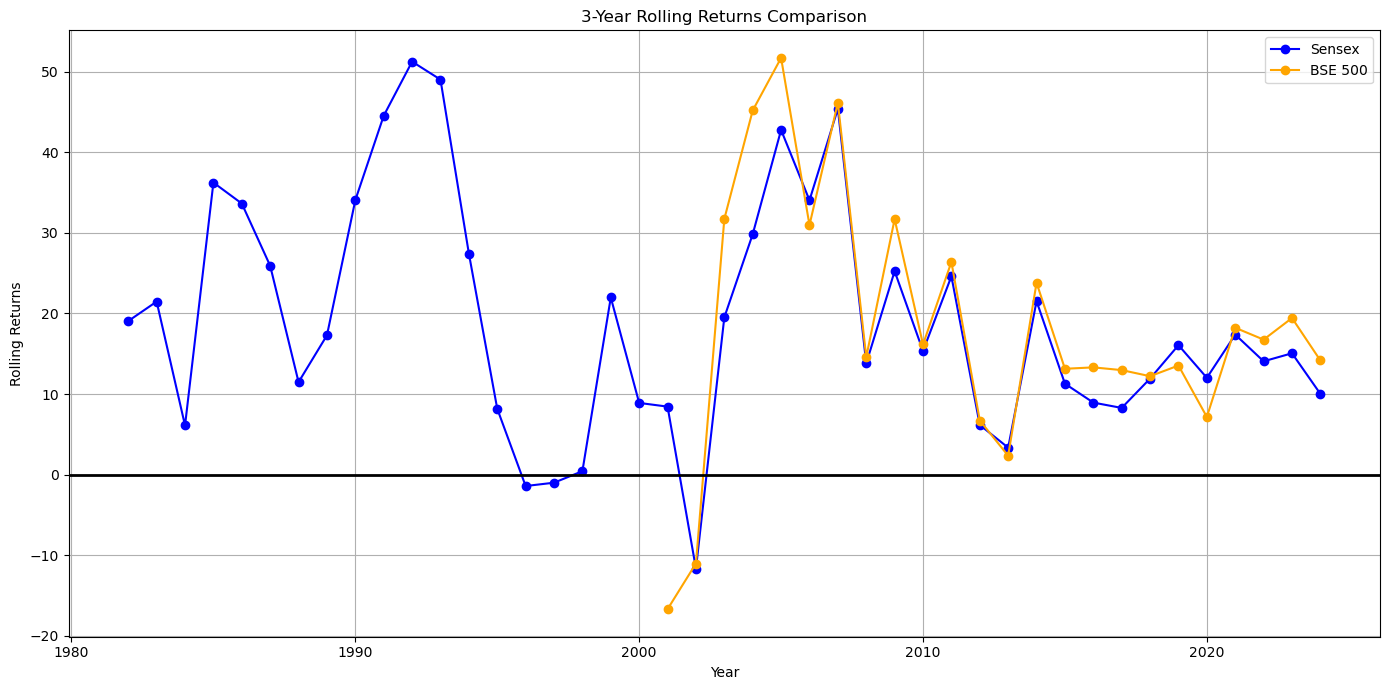

In [39]:
# Calculate the rolling returns
snsx_rolling_3y = snsx['returns'].rolling(window=3).mean()
snsx_rolling_3y = snsx_rolling_3y.dropna()
bse500_rolling_3y = bse500['returns'].rolling(window=3).mean()
bse500_rolling_3y = bse500_rolling_3y.dropna()

# Plot the rolling returns
plt.figure(figsize=(14, 7))
plt.plot(snsx_rolling_3y.index, snsx_rolling_3y, marker='o', color = "blue", label='Sensex')
plt.plot(bse500_rolling_3y.index, bse500_rolling_3y, marker='o', color='orange', label='BSE 500')

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('3-Year Rolling Returns Comparison')
plt.xlabel('Year')
plt.ylabel('Rolling Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

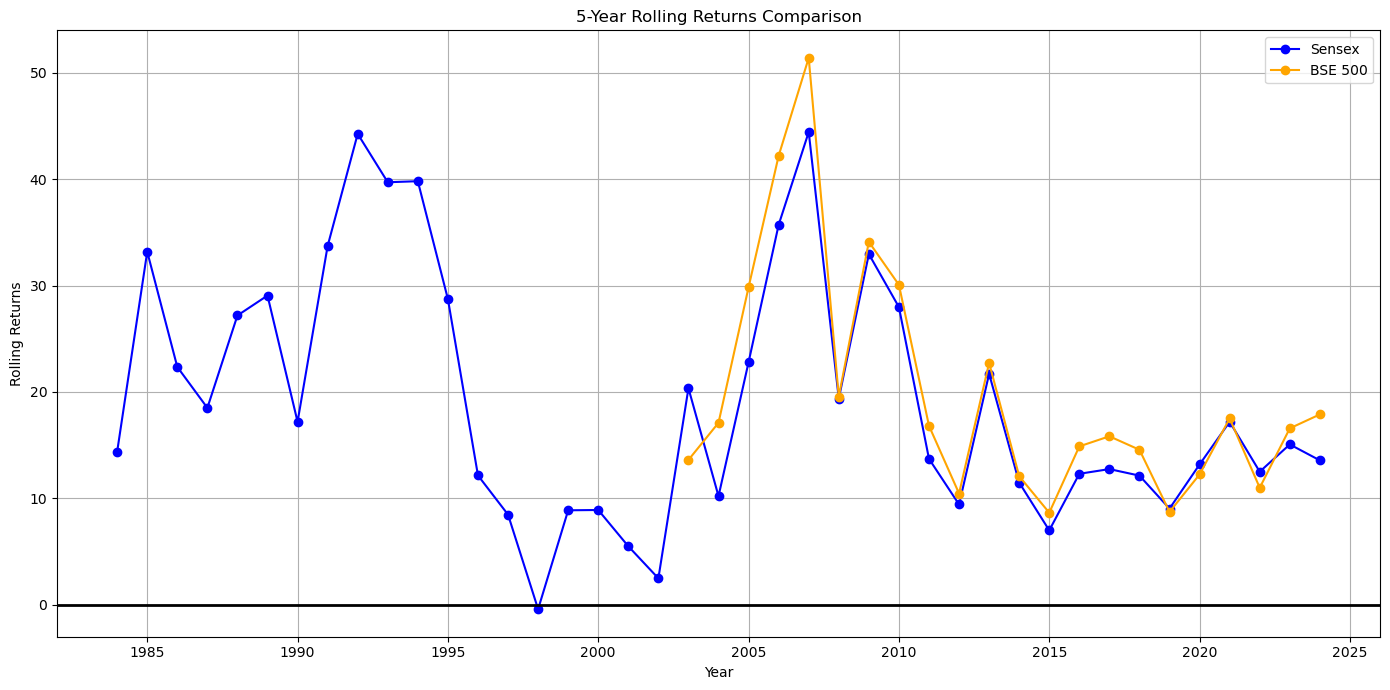

In [40]:
# Calculate the rolling returns
snsx_rolling_5y = snsx['returns'].rolling(window=5).mean()
snsx_rolling_5y = snsx_rolling_5y.dropna()
bse500_rolling_5y = bse500['returns'].rolling(window=5).mean()
bse500_rolling_5y = bse500_rolling_5y.dropna()

# Plot the rolling returns
plt.figure(figsize=(14, 7))
plt.plot(snsx_rolling_5y.index, snsx_rolling_5y, marker='o', color = "blue", label='Sensex')
plt.plot(bse500_rolling_5y.index, bse500_rolling_5y, marker='o', color='orange', label='BSE 500')

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('5-Year Rolling Returns Comparison')
plt.xlabel('Year')
plt.ylabel('Rolling Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

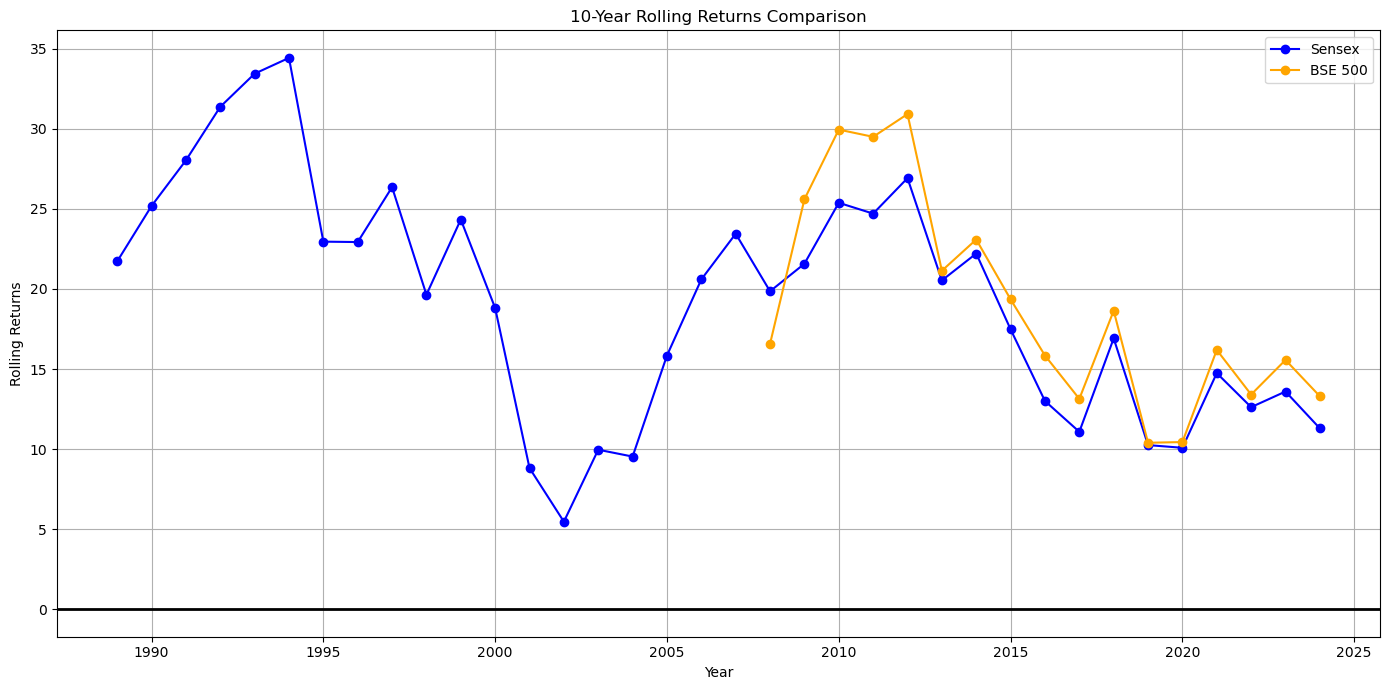

In [41]:
# Calculate the rolling returns
snsx_rolling_10y = snsx['returns'].rolling(window=10).mean()
snsx_rolling_10y = snsx_rolling_10y.dropna()
bse500_rolling_10y = bse500['returns'].rolling(window=10).mean()
bse500_rolling_10y = bse500_rolling_10y.dropna()

# Plot the rolling returns
plt.figure(figsize=(14, 7))
plt.plot(snsx_rolling_10y.index, snsx_rolling_10y, marker='o', color = "blue", label='Sensex')
plt.plot(bse500_rolling_10y.index, bse500_rolling_10y, marker='o', color='orange', label='BSE 500')

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('10-Year Rolling Returns Comparison')
plt.xlabel('Year')
plt.ylabel('Rolling Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

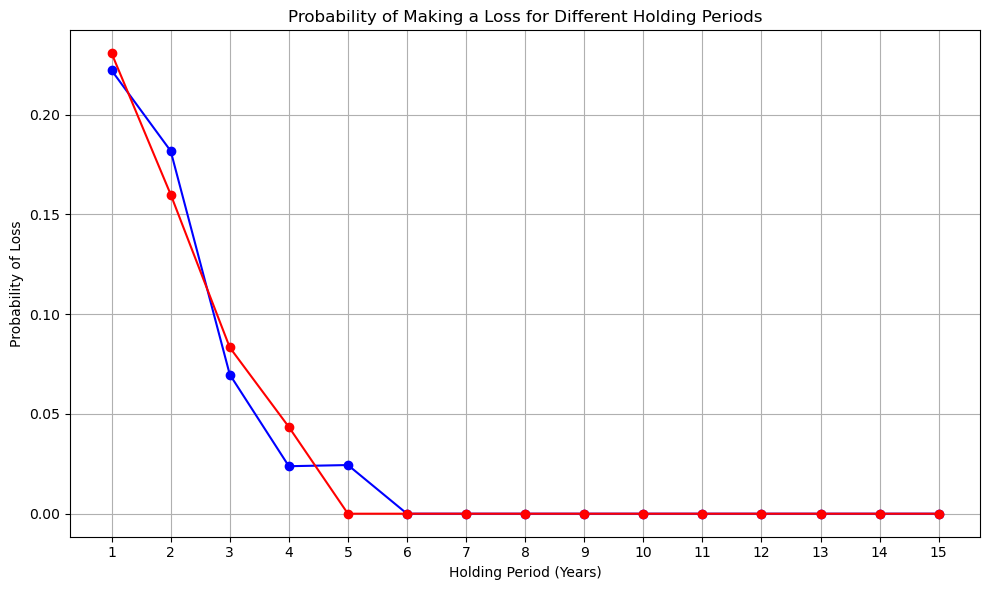

In [43]:
# Calculate the probability of making a loss for different holding periods
holding_periods = range(1, 16)
snsx_probabilities = []
bse500_probabilities = []

for period in holding_periods:
    # Calculate rolling returns
    snsx_rolling_returns = snsx['returns'].rolling(window=period).mean()
    snsx_rolling_returns = snsx_rolling_returns.dropna()
    bse500_rolling_returns = bse500['returns'].rolling(window=period).mean()
    bse500_rolling_returns = bse500_rolling_returns.dropna()
    
    # Count number of negative rolling returns
    snsx_num_losses = (snsx_rolling_returns < 0).sum()
    bse500_num_losses = (bse500_rolling_returns < 0).sum()
    
    # Calculate probability of loss
    snsx_probability = snsx_num_losses / len(snsx_rolling_returns)
    bse500_probability = bse500_num_losses / len(bse500_rolling_returns)
    
    snsx_probabilities.append(snsx_probability)
    bse500_probabilities.append(bse500_probability)
    
# Plotting the probabilities
plt.figure(figsize=(10, 6))
plt.plot(holding_periods, snsx_probabilities, marker='o', linestyle='-', color='b')
plt.plot(holding_periods, bse500_probabilities, marker='o', linestyle='-', color='r')

# Adding title and labels
plt.title('Probability of Making a Loss for Different Holding Periods')
plt.xlabel('Holding Period (Years)')
plt.ylabel('Probability of Loss')
plt.xticks(holding_periods)
plt.grid(True)
plt.tight_layout()
plt.show()

Based on 44 years of historical data, if you hold your investments in sensex for more than 6 years, it has NEVER incurred a loss.

In [11]:
# Calculate correlation of returns for overlapping period (1999 onwards)
correlation = snsx.loc[1999:, 'returns'].corr(bse500.loc[1999:, 'returns'])

print(f"Correlation of Returns between SNSX and BSE500 (1999 onwards): {correlation:.2f}")


Correlation of Returns between SNSX and BSE500 (1999 onwards): 0.89


In [60]:
# Define the thresholds and time periods
thresholds = [7, 10, 13, 18]
time_periods = ['3y', '5y', '10y']  # 3 years, 5 years, and 10 years

# Calculate probabilities for a given series
def calc_probabilities(series, thresholds):
    probabilities = {}
    for threshold in thresholds:
        probabilities[f'>={threshold}%'] = (series >= threshold).mean()
    return probabilities

# Calculate probabilities for each time period and index
probabilities_data = []

for time_period in time_periods:
    for index_name, series in [('SNSX', globals()[f'snsx_rolling_{time_period}']), 
                               ('BSE500', globals()[f'bse500_rolling_{time_period}'])]:
        probabilities = calc_probabilities(series, thresholds)
        for threshold_label, prob in probabilities.items():
            probabilities_data.append((time_period, index_name, threshold_label, prob))

# Convert to DataFrame for plotting
df = pd.DataFrame(probabilities_data, columns=['Time Period', 'Index', 'Threshold', 'Probability'])

df.sample(6)

,Time Period,Index,Threshold,Probability
1,3y,SNSX,>=10%,0.720930
13,5y,BSE500,>=10%,0.909091
10,5y,SNSX,>=13%,0.609756
23,10y,BSE500,>=18%,0.470588
7,3y,BSE500,>=18%,0.416667
0,3y,SNSX,>=7%,0.837209


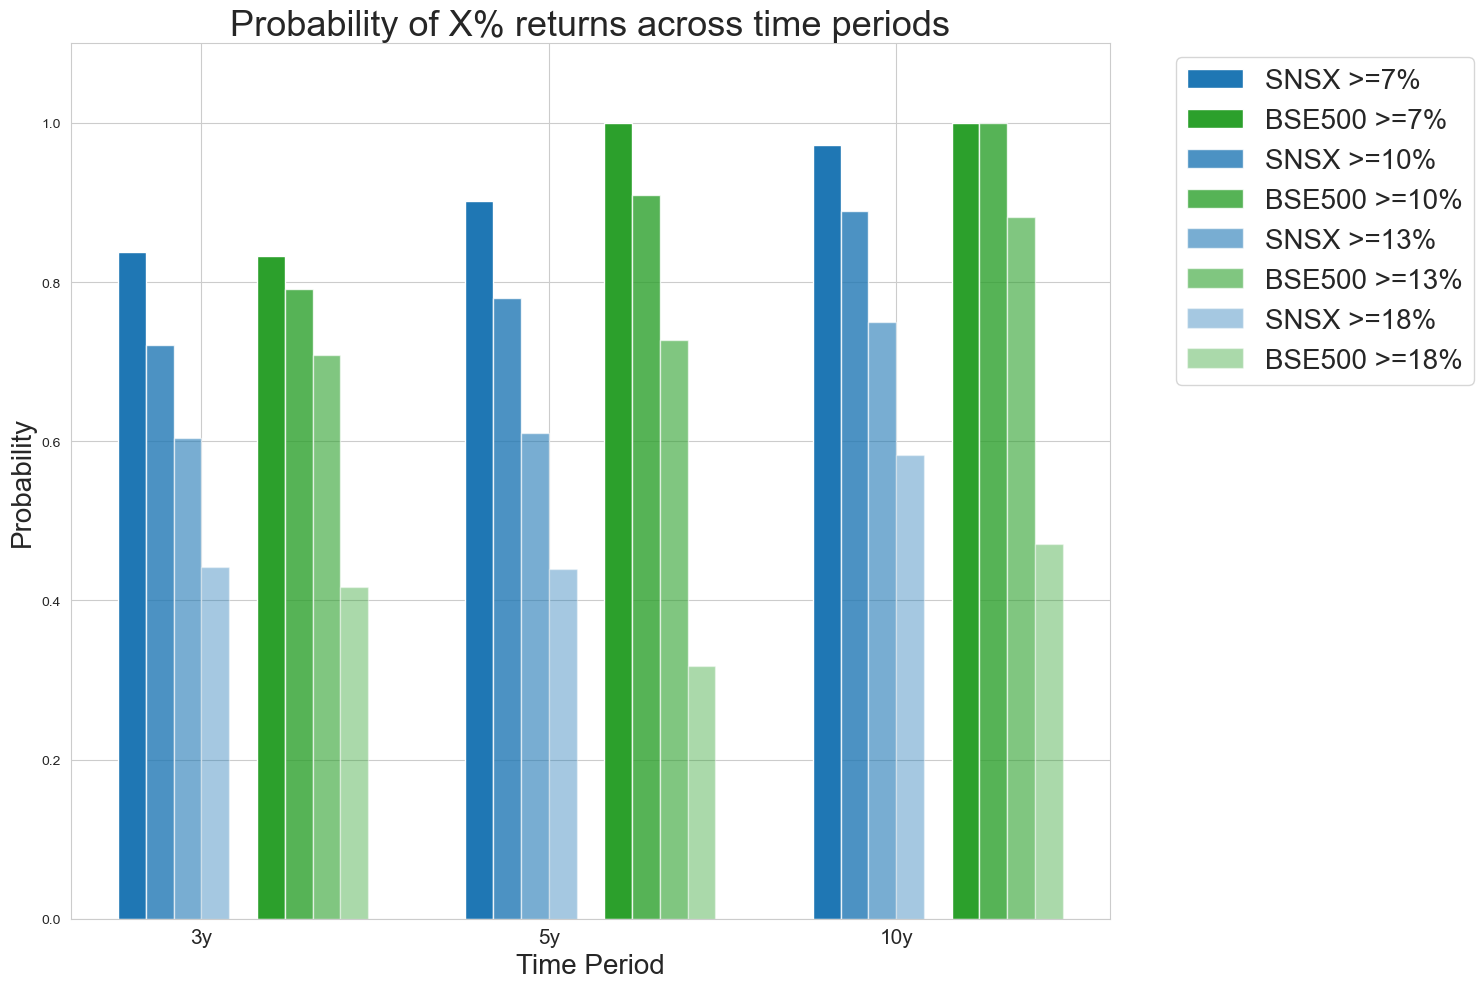

In [84]:
# Reshape the data and sort by Time Period
df_pivot = df.pivot(index=['Time Period', 'Threshold'], columns='Index', values='Probability').reset_index()
df_pivot['Time Period'] = pd.Categorical(df_pivot['Time Period'], categories=['3y', '5y', '10y'], ordered=True)
df_pivot = df_pivot.sort_values('Time Period')

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Define width of a bar and positions of the bars
width = 0.08
x = np.arange(len(df_pivot['Time Period'].unique()))

# Define colors for SNSX and BSE500
color_snsx = '#1f77b4'  # Blue
color_bse500 = '#2ca02c'  # Green

# Define opacity levels for thresholds
opacities = [1.0, 0.8, 0.6, 0.4]

# Plot bars for each threshold
for i, threshold in enumerate(['>=7%', '>=10%', '>=13%', '>=18%']):
    mask = df_pivot['Threshold'] == threshold
    ax.bar(x - 0.2 + i*width, df_pivot[mask]['SNSX'], width, 
           label=f'SNSX {threshold}', color=color_snsx, alpha=opacities[i])
    ax.bar(x + 0.2 + i*width, df_pivot[mask]['BSE500'], width, 
           label=f'BSE500 {threshold}', color=color_bse500, alpha=opacities[i])

# Customize the plot
ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('Time Period', fontsize=20)
ax.set_title('Probability of X% returns across time periods', fontsize=26)
ax.set_xticks(x)
ax.set_xticklabels(df_pivot['Time Period'].unique(), fontsize=15)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
ax.grid(True)
ax.set_ylim(0, 1.1)
plt.tight_layout()
plt.show()
